# Connect folder contain dataset

In [1]:
# from google.colab import drive
# drive.mount('/gdrive')

**Move to folder contain dataset**

In [2]:
# cd ../gdrive/MyDrive/"[IS252] FinalProject"/

In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\super\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


#Import Libraries

In [4]:
import ast
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold,train_test_split
from sklearn.metrics import f1_score,recall_score,accuracy_score,precision_score,confusion_matrix,classification_report,ConfusionMatrixDisplay,precision_recall_fscore_support

# Load Data

In [5]:
dataset_path = 'CreditScore_OneHot.csv'

df = pd.read_csv(dataset_path)

FileNotFoundError: [Errno 2] No such file or directory: 'CreditScore_OneHot.csv.csv'

In [ ]:
df.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Credit-Builder_Loan,Debt_Consolidation_Loan,Home_Equity_Loan,Mortgage_Loan,No_Data,Not_Specified,Payday_Loan,Personal_Loan,Student_Loan,Credit_Score
0,1,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,...,1,0,1,0,0,0,0,1,0,0
1,2,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,-1.0,...,1,0,1,0,0,0,0,1,0,0
2,3,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,...,1,0,1,0,0,0,0,1,0,0
3,4,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,...,1,0,1,0,0,0,0,1,0,0
4,5,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,...,1,0,1,0,0,0,0,1,0,0


# Train - Test split

In [ ]:
# Split dataset to input features and output
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Print shape
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (100000, 33)
y shape: (100000,)


In [ ]:
# Train test split with test size is 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print training set shape
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}\n")

# Print testing set shape
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (80000, 33)
y_train shape: (80000,)

X_test shape: (20000, 33)
y_test shape: (20000,)


# Min - max normalization

In [ ]:
# Initialize a Min-Max scaler with a range from 0 to 1
scaler = MinMaxScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data based on the parameters fitted from the training data
X_test_scaled = scaler.transform(X_test)

# Run model with default parameters

In [ ]:
# Create a RandomForestClassifier with default parameters
rfTree = RandomForestClassifier()

# Get parameters from the RandomForestClassifier
params_dict = rfTree.get_params()

# Create a DataFrame from the parameters dictionary for inspection
pd.DataFrame.from_dict(params_dict, orient='index', columns=['Value'])

,Value
bootstrap,True
ccp_alpha,0.0
class_weight,None
criterion,gini
max_depth,None
max_features,sqrt
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0
min_samples_leaf,1


In [ ]:
# Train the RandomForestClassifier on the training data
# And make predictions on the test data
rfTree.fit(X_train_scaled, y_train)
y_pred = rfTree.predict(X_test_scaled)

# Print a classification report to evaluate the performance of the classifier
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      3527
           1       0.82      0.86      0.84      5874
           2       0.86      0.83      0.84     10599

    accuracy                           0.84     20000
   macro avg       0.83      0.83      0.83     20000
weighted avg       0.84      0.84      0.84     20000



# 6. Tuning Model

In [ ]:
# Hyperparameter grid for fine-tuning the Decision Tree Classifier
param_grid = {
    # Complexity parameter used for Minimal Cost-Complexity Pruning
    'ccp_alpha': [0.0, 0.01],

    # Function to measure the quality of a split
    'criterion': ['gini', 'entropy'],

    # Maximum depth of the tree
    'max_depth': [None, 10],

    # Maximum number of leaf nodes in the tree
    'max_leaf_nodes': [None, 10, 20],

    # Minimum number of samples required to be at a leaf node
    'min_samples_leaf': [2, 4],

    # Minimum number of samples required to split an internal node
    'min_samples_split': [5, 10],

    # Whether to use out-of-bag samples to estimate the generalization score.
    'oob_score': [False, True]

}

# Initialize GridSearchCV with DecisionTreeClassifier and the hyperparameter grid
grid_search = GridSearchCV(rfTree,
                           param_grid,
                           verbose=3)

#
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits
[CV 1/5] END ccp_alpha=0.0, criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=2, min_samples_split=5, oob_score=False;, score=0.819 total time=  14.9s
[CV 2/5] END ccp_alpha=0.0, criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=2, min_samples_split=5, oob_score=False;, score=0.822 total time=  15.1s
[CV 3/5] END ccp_alpha=0.0, criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=2, min_samples_split=5, oob_score=False;, score=0.817 total time=  15.1s
[CV 4/5] END ccp_alpha=0.0, criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=2, min_samples_split=5, oob_score=False;, score=0.814 total time=  14.8s
[CV 5/5] END ccp_alpha=0.0, criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=2, min_samples_split=5, oob_score=False;, score=0.815 total time=  14.9s
[CV 1/5] END ccp_alpha=0.0, criterion=gini, max_depth=None, max_leaf_nodes=None, m

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'ccp_alpha': [0.0, 0.01],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10],
                         'max_leaf_nodes': [None, 10, 20],
                         'min_samples_leaf': [2, 4],
                         'min_samples_split': [5, 10],
                         'oob_score': [False, True]},
             verbose=3)

**Saving grid search tuning result**

In [ ]:
joblib.dump(grid_search, 'RF_grid_onehot.pkl')

['RF_grid.pkl']

**Loading grid search tuning result**

In [ ]:
# grid_search = joblib.load('RF_grid.pkl')

In [ ]:
# Print the best parameters and the best accuracy on the validation set
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Parameters: {'ccp_alpha': 0.0, 'criterion': 'entropy', 'max_depth': None, 'max_leaf_nodes': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'oob_score': True}
Best Accuracy: 0.8179125


In [ ]:
# Extracting Grid Search results information and converting it to a DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)

# Selecting important columns for analysis
selected_columns = ['params', 'mean_test_score', 'std_test_score', 'rank_test_score']
results_df = results_df[selected_columns]

# Sorting the DataFrame based on rank_test_score in ascending order
results_df = results_df.sort_values(by='rank_test_score')

# Saving the selected DataFrame to a CSV file
results_df.to_csv('GridSearchCV_RandomForest_Onehot.csv', index=False)

# 7.&nbsp;Evaluation

## 7.1.&nbsp;Training And Testing

In [ ]:
rfTree_gscv = pd.read_csv("GridSearchCV_RandomForest_Onehot.csv")
best_params = ast.literal_eval(rfTree_gscv['params'][0])

In [ ]:
# Create a RandomForestClassifier with best parameters
rfTree = RandomForestClassifier(**best_params)

# Get parameters from the RandomForestClassifier
params_dict = rfTree.get_params()

# Create a DataFrame from the parameters dictionary for inspection
pd.DataFrame.from_dict(params_dict, orient='index', columns=['Value'])

,Value
bootstrap,True
ccp_alpha,0.0
class_weight,None
criterion,entropy
max_depth,None
max_features,sqrt
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0
min_samples_leaf,2


In [ ]:
# Train the RandomForestClassifier on the training data
# And make predictions on the test data
rfTree.fit(X_train_scaled, y_train)
y_pred = rfTree.predict(X_test_scaled)

# Print a classification report to evaluate the performance of the classifier
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      3527
           1       0.81      0.85      0.83      5874
           2       0.85      0.83      0.84     10599

    accuracy                           0.83     20000
   macro avg       0.82      0.83      0.82     20000
weighted avg       0.83      0.83      0.83     20000



In [ ]:
# Display evaluation metrics
print(f"Accuracy : {accuracy_score(y_test, y_pred):.3f}")
print(f"Average Macro Precision : {precision_score(y_test, y_pred, average='macro'):.3f}")
print(f"Average Macro Recall : {recall_score(y_test, y_pred, average='macro'):.3f}")
print(f"Average Macro F1 : {f1_score(y_test, y_pred, average='macro'):.3f}")

Accuracy : 0.830
Average Macro Precision : 0.821
Average Macro Recall : 0.825
Average Macro F1 : 0.823


## 7.2.&nbsp;Cross Validation (K-Fold)

In [ ]:
# Plot accuracy, macro average precision, recall and f1 score
# Define class labels for better interpretation
target_names = ['Good', 'Poor', 'Standard']

# Initialize K-Fold cross-validator with 10 splits and shuffle the data
kf = KFold(n_splits=10, shuffle=True)

# List to store metrics for each fold
metrics = []

# Lists to store performance metrics across all folds
acc = []  # Accuracy
f1_macro = []  # Macro-average F1 score
recall_macro = []  # Macro-average recall
precision_macro = []  # Macro-average precision

# Initialize an array to store confusion matrices
confusion_matrices = np.zeros((3, 3))

# Iterate over each fold
for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"Fold {i}:")

    # Apply Min-Max scaling to the training data for the current fold
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X[train_index])

    # Fit the DecisionTreeClassifier on the scaled training data
    rfTree.fit(X_train_scaled, y[train_index])

    # Apply Min-Max scaling to the test data for the current fold
    X_test_scaled = scaler.transform(X[test_index])

    # Predict the labels for the scaled test data
    y_pred = rfTree.predict(X_test_scaled)

    # Display the classification report with precision, recall, and F1 score
    print(classification_report(y[test_index], y_pred, target_names=target_names))

    # Calculate precision, recall, F1 score, and support for each class
    metrics.append(precision_recall_fscore_support(y[test_index], y_pred))
    print()

    # Calculate and store accuracy for the current fold
    acc.append(rfTree.score(X_test_scaled, y[test_index]))

    # Calculate and store macro-average F1 score for the current fold
    f1_macro.append(f1_score(y[test_index], y_pred, average="macro"))

    # Calculate and store macro-average recall for the current fold
    recall_macro.append(recall_score(y[test_index], y_pred, average="macro"))

    # Calculate and store macro-average precision for the current fold
    precision_macro.append(precision_score(y[test_index], y_pred, average="macro"))

    # Update the confusion matrix with the results from the current fold
    confusion_matrices += confusion_matrix(y[test_index], y_pred)

# Calculate and display the mean accuracy across all folds
print(f"Mean accuracy: {np.mean(acc):.3f}")

Fold 0:
              precision    recall  f1-score   support

        Good       0.81      0.81      0.81      1746
        Poor       0.82      0.86      0.84      2981
    Standard       0.86      0.83      0.84      5273

    accuracy                           0.84     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.84      0.84      0.84     10000


Fold 1:
              precision    recall  f1-score   support

        Good       0.81      0.81      0.81      1849
        Poor       0.82      0.86      0.84      2935
    Standard       0.85      0.83      0.84      5216

    accuracy                           0.84     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.84      0.84      0.84     10000


Fold 2:
              precision    recall  f1-score   support

        Good       0.80      0.81      0.80      1747
        Poor       0.81      0.88      0.84      2897
    Standard       0.87      0.83      0.85      

## 7.3.&nbsp;Visualization

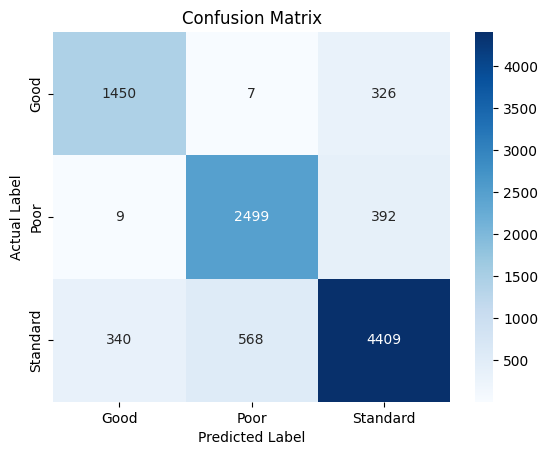

In [ ]:
# Create labels for the confusion matrix
labels = ['Good', 'Poor', 'Standard']

# Create a heatmap using seaborn
sns.heatmap(np.round(confusion_matrices / 10).astype(np.int64), annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)

# Set plot title and axes labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

# Display the plot
plt.show()

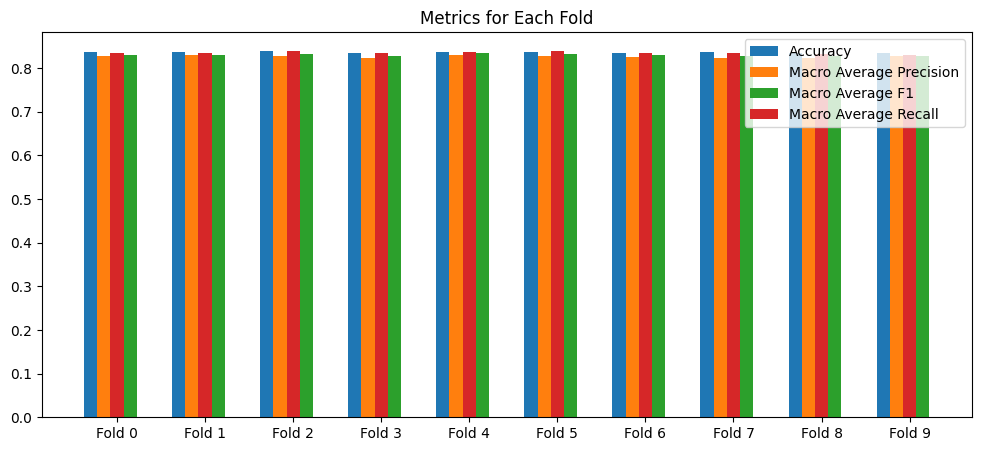

In [ ]:
# Set the figure size
plt.figure(figsize=(12, 5))

# Define labels for the x-axis (ticks) based on fold numbers
X_ticks = ["Fold " + str(i) for i in range(10)]

# Create an array representing the x-axis positions for the bars
X_axis = np.arange(len(X_ticks))

# Plot the bars for accuracy, macro-average F1, macro-average recall, and macro-average precision
# Each bar is positioned at its corresponding x-axis position
# The width of each bar is set to 0.15 for better visualization
plt.bar(X_axis - 0.3, acc, 0.15, label="Accuracy", tick_label=X_ticks)
plt.bar(X_axis - 0.15, precision_macro, 0.15, label="Macro Average Precision", tick_label=X_ticks)
plt.bar(X_axis + 0.15, f1_macro, 0.15, label="Macro Average F1", tick_label=X_ticks)
plt.bar(X_axis, recall_macro, 0.15, label="Macro Average Recall", tick_label=X_ticks)

# Set the title of the plot
plt.title("Metrics for Each Fold")

# Add a legend to the plot to identify each metric
plt.legend()

# Display the plot
plt.show()

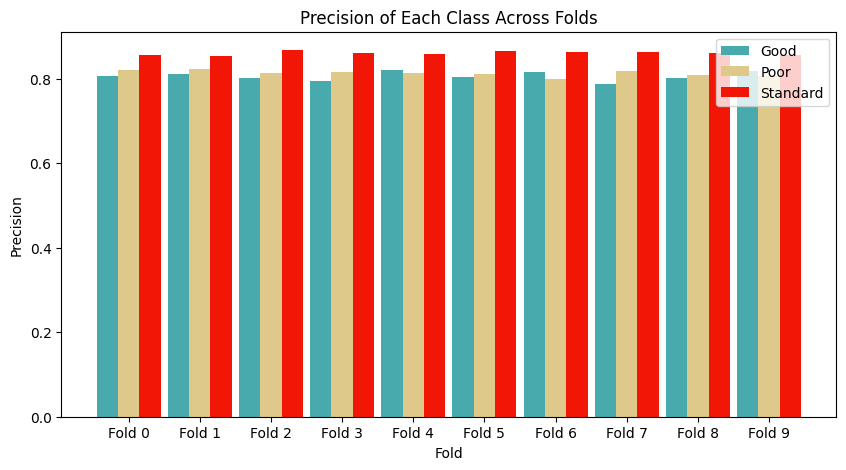

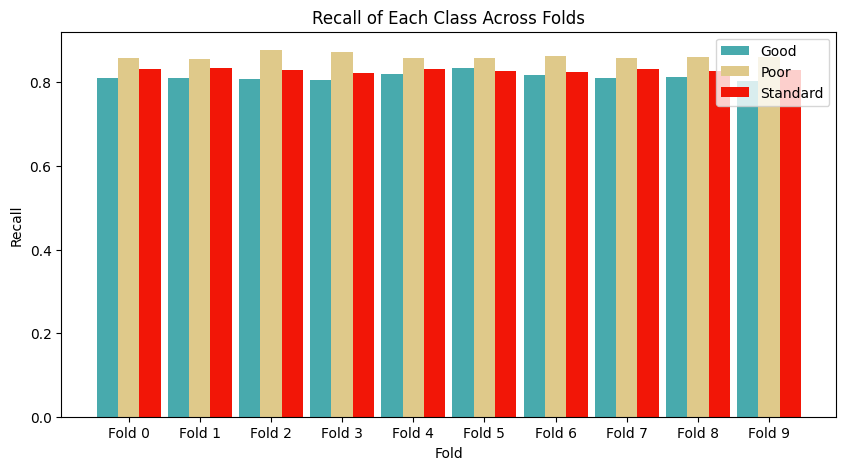

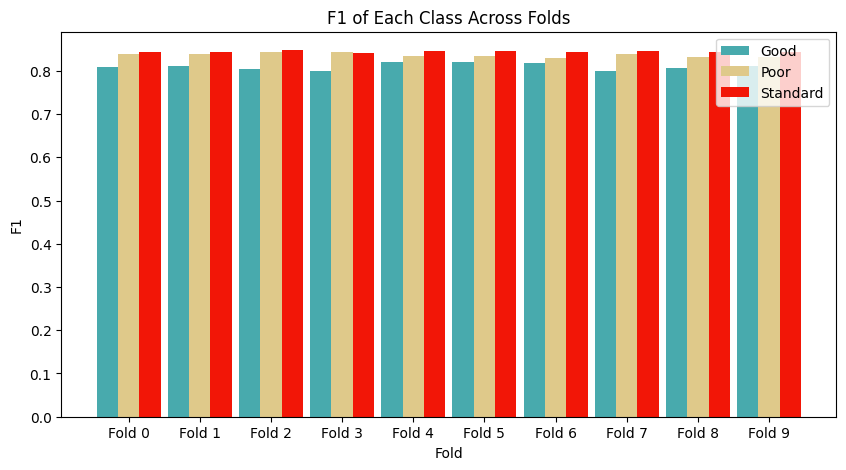

In [ ]:
# Create a dictionary to store precision, recall, and F1 values for each class
metrics_dict = {
    "Precision": [],
    "Recall": [],
    "F1": []
}

# Extract precision, recall, and F1 values for each fold and class and store in the dictionary
for i in range(10):
    metrics_dict["Precision"].append(metrics[i][0])
    metrics_dict["Recall"].append(metrics[i][1])
    metrics_dict["F1"].append(metrics[i][2])

# Stack the precision, recall, and F1 values for each class vertically
# This is done to facilitate plotting using matplotlib
metrics_dict["Precision"] = np.vstack(metrics_dict["Precision"])
metrics_dict["Recall"] = np.vstack(metrics_dict["Recall"])
metrics_dict["F1"] = np.vstack(metrics_dict["F1"])

# Iterate over each metric and plot a grouped bar chart for each class
for metric, values in metrics_dict.items():
    plt.figure(figsize=(10, 5))

    # Plot bars for each class at their respective positions
    plt.bar(X_axis - 0.2, values[:, 0], 0.3, label="Good", color="#48AAAD")
    plt.bar(X_axis + 0.1, values[:, 1], 0.3, label="Poor", tick_label=X_ticks, color="#DFC98A")
    plt.bar(X_axis + 0.4, values[:, 2], 0.3, label="Standard", color="#f21607")

    # Set plot title, x-axis label, and y-axis label
    plt.title(f"{metric} of Each Class Across Folds")
    plt.xlabel("Fold")
    plt.ylabel(f"{metric}")

    # Add legend to identify each class
    plt.legend()

    # Display the plot
    plt.show()

In [ ]:
print(f"Average Macro Precision : {np.mean(precision_macro):.3f}")
print(f"Average Macro Recall : {np.mean(recall_macro):.3f}")
print(f"Average Macro F1 : {np.mean(f1_macro):.3f}")

Average Macro Precision : 0.826
Average Macro Recall : 0.835
Average Macro F1 : 0.830


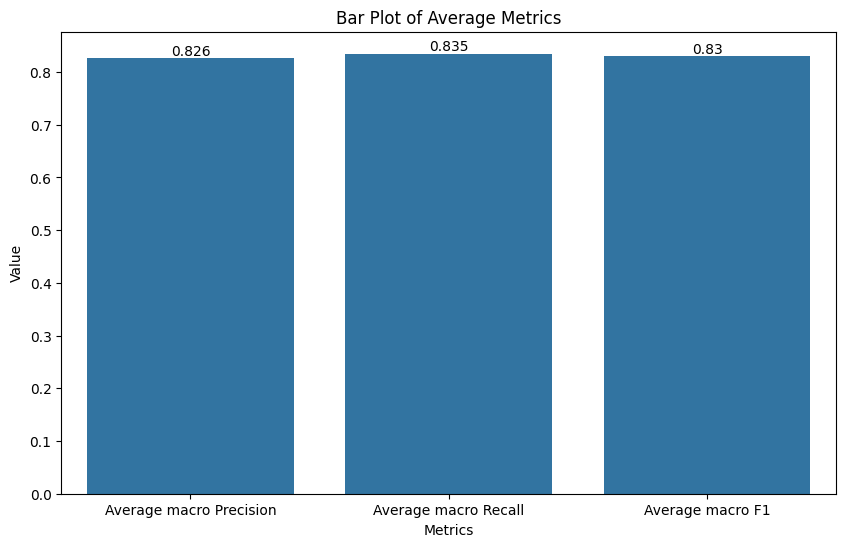

In [ ]:
# Sample data
categories = ['Average macro Precision', 'Average macro Recall', 'Average macro F1']
values = [np.mean(precision_macro), np.mean(recall_macro), np.mean(f1_macro)]

# Set the figure size
plt.figure(figsize=(10, 6))

# Create bar plot
sns.barplot(x=categories, y=values)

# Add numbers on top of the bars
for i, v in enumerate(values):
    plt.text(i, v, str(round(v, 3)), ha='center', va='bottom')

# Set plot title and axes labels
plt.title('Bar Plot of Average Metrics')
plt.xlabel('Metrics')
plt.ylabel('Value')

# Display the plot
plt.show()